*Please note: This is a coding challenge I set for myself.*

*Please note: Idea of this challenge is based on the book "Make Your Own Neural Network" by Tariq Rashid*

## Coding Challenge:
1. Get more practice with jupyter notebook
2. Get more practice with git
3. Get more practice with python
4. Write a simple multilayer perceptron and show that it is able to learn the MNIST handwritten digit database

### MNIST Dataset

The MNIST database is a large database of handwritten digits(0-9). The dataset is commonly used for training various image processing systems. To train a multilayer perceptron(MLP) on pictures we need to convert the image matrix to a vector. For the MNIST dataset, this means we need to convert a 28x28 matrix into a vector with the size of 784. The general layout of the network will be:

* input layer with 784 input nodes (for the 28x28 images)
* one hidden layer with x nodes
* output layer with 10 nodes (for the labels 0-9)

In [73]:
import numpy as np
from scipy import special

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
class MultilayerPerceptron(object):
    """A simple multilayer perceptron

    :param input_nodes: An int, the number of input nodes
    :param input_nodes: An int, the number of hidden nodes
    :param output_nodes: An int, the number of output nodes
    :param weights: A numpy array of the shape(3,1), the weight matrix
    :param activation_function: activation function at the output node -> in this case a step function
    :param learning_rate : A float, the learning speed coefficient
    :param error : A numpy array, holding the errors for the current epoch
    """
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.w_i_h = np.random.normal(0.0, pow(input_nodes, -0.5), (hidden_nodes, input_nodes))
        self.w_h_o = np.random.normal(0.0, pow(hidden_nodes, -0.5), (output_nodes, hidden_nodes))

        self.output_error = 1
        
        self.lr = learning_rate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: 1 / ( 1 + np.exp(-x) )
        self.activation_function_derivative = lambda x: x * ( 1 - x )
        self.activation_function_inverse = lambda x: special.logit(x)
    
    def train(self, inputs, targets):
        """ Performance a single training steep. Run the feedforward step, 
            run backpropagation and update the weights"""
        hidden_outputs, final_outputs = self.feedforward(inputs)
        self.update_weights(inputs, targets, hidden_outputs, final_outputs)

    def update_weights(self, inputs, targets, hidden_outputs, final_outputs):
        """Calculate the output error, perform backpropagation and update the weights"""
        # calculate errors
        self.output_error = targets - final_outputs
        hidden_errors = np.dot(self.w_h_o.T, self.output_error)     
        # update weights 
        self.w_h_o += self.lr * np.dot((self.output_error * final_outputs * (1.0 - final_outputs)), hidden_outputs.T)
        self.w_i_h += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.T)
        
    def feedforward(self, inputs):
        """ Performance a single feedforward steep through the whole network."""
        hidden_inputs = np.dot(self.w_i_h, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.w_h_o, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return hidden_outputs, final_outputs
        
    def predict(self, inputs):
        """ Performance a single feedforward steep through the whole network 
            and get the resulting network prediction"""
        _, final_outputs = self.feedforward(inputs)
        
        return final_outputs
    
    def rescale(self, unscaled_values):
        """ Helper function to scale the input to a value between 0.01 and 0.99 """
        scaled_values = unscaled_values
        scaled_values -= np.min(scaled_values)
        scaled_values /= np.max(scaled_values)
        scaled_values *= 0.99
        scaled_values += 0.01
        
        return scaled_values
        
    def backquery(self, targets):
        """ Run the network backward, given a label, too see the learned generalization """
        
        final_inputs = self.activation_function_inverse(targets)
        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.w_h_o.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs = self.rescale(hidden_outputs)
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.activation_function_inverse(hidden_outputs)
        # calculate the signal out of the input layer
        inputs = np.dot(self.w_i_h.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs = self.rescale(inputs)
        
        return inputs

In [88]:
multilayer_perceptron = MultilayerPerceptron(input_nodes = 784, 
                                             hidden_nodes = 200, 
                                             output_nodes = 10, 
                                             learning_rate = 0.1)

## Train the network

In [89]:
epochs = 5

for e in range(epochs):
    with open("mnist_dataset/mnist_train.csv", 'r') as mnist_train:
        for record in mnist_train.readlines():
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (np.asfarray(all_values[1:]).T / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = np.zeros(10).T + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            multilayer_perceptron.train(np.array(inputs, ndmin=2).T, np.array(targets, ndmin=2).T)

## Test the neural network

In [91]:
scorecard = []

# go through all the records in the test data set
for e in range(epochs):
    with open("mnist_dataset/mnist_test.csv", 'r') as mnist_test:
        for record in mnist_test.readlines():
            all_values = record.split(',')
            # correct answer is first value
            correct_label = int(all_values[0])
            # scale and shift the inputs
            inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            outputs = multilayer_perceptron.predict(np.array(inputs, ndmin=2).T)
            # the index of the highest value corresponds to the label
            label = np.argmax(outputs)

            if (label == correct_label):
                scorecard.append(1)
            else:
                scorecard.append(0)
                
# calculate the accuracy of the network 
scorecard_array = np.asarray(scorecard)
print ("Overall performance = ", scorecard_array.sum() / scorecard_array.size)

Overall performance =  0.9725


## Backquery

Backquery means to run the network backward, given a label, too see the learned generalization. 

[ 0.99  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]


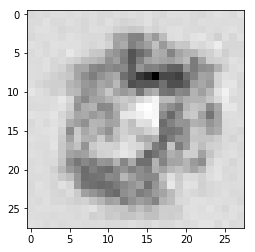

In [92]:
# label to test
label = 0
# create the output signals for this label
output_nodes = 10
targets = np.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

image_data = multilayer_perceptron.backquery(np.array(targets, ndmin=2).T)
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')